In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Read csv file into a pandas dataframe
df = pd.read_csv("31084524_outlier_data.csv")

# Take a look at the first few rows
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD258958,ID0579994959,2019-11-15,Thompson,"[('Olivia x460', 2), ('pearTV', 2), ('Alcon 10...",39870,81.68,-37.802796,144.936429,15,33971.18,Spring,False,1.4438,everything is perfect. got it on time and ever...,True
1,ORD224285,ID0443297188,2019-11-22,Bakers,"[('Candle Inferno', 2), ('Thunder line', 1), (...",5490,44.49,-37.816484,145.005003,0,5578.98,Spring,True,1.1225,no wifi can only download updates and other th...,False
2,ORD358711,ID0176704338,2019-05-22,Nickolson,"[('Universe Note', 2), ('Thunder line', 1), ('...",11540,65.42,-37.811444,144.963858,15,9874.42,Autumn,False,0.9404,four stars good,True
3,ORD350988,ID0107156541,2019-06-06,Nickolson,"[('iAssist Line', 1), ('Lucent 330S', 1)]",3455,74.88,-37.822875,144.976522,5,3357.13,Winter,True,0.7764,i have been using this phone for 2 years now ....,True
4,ORD096192,ID6167441075,2019-04-21,Nickolson,"[('iStream', 1), ('Candle Inferno', 2), ('Alco...",9960,65.03,-37.815915,144.964706,15,8531.03,Autumn,False,0.5201,this was a replacement of an older version of ...,True


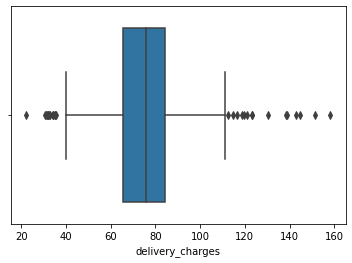

In [4]:
import seaborn as sns
import matplotlib as plt
sns.boxplot(x=df['delivery_charges'])


In [13]:
fence_low=40
fence_high=110
df_out = df.loc[(df['delivery_charges'] > fence_low) & (df['delivery_charges'] < fence_high)]

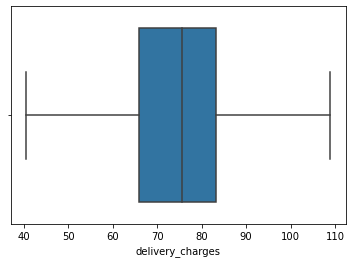

In [14]:
import seaborn as sns
import matplotlib as plt
sns.boxplot(x=df_out['delivery_charges'])

In [15]:
df_out.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,14007.724359,75.959295,-37.812203,144.966365,11.228632,12519.151068,1.099081
std,8376.220657,14.844562,0.007720,0.022288,8.763920,7593.674216,0.494744
min,580.000000,40.465000,-37.829895,144.925532,0.000000,570.400000,0.093600
25%,7041.250000,65.947500,-37.818696,144.949846,5.000000,6456.815000,0.742650
50%,12447.500000,75.575000,-37.812528,144.963299,10.000000,10954.575000,1.058550
75%,19908.750000,83.310000,-37.805417,144.982150,15.000000,17445.775000,1.418625
max,43610.000000,108.940000,-37.796916,145.022630,25.000000,39330.050000,2.539000


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time

analyzer = SentimentIntensityAnalyzer()
df_out['rating'] = df_out['latest_customer_review'].apply(analyzer.polarity_scores)
pd.concat([df_out.drop(['rating'], axis=1), df_out['rating'].apply(pd.Series)], axis=1)

<ipython-input-23-ef06f6c8d9c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['rating'] = df_out['latest_customer_review'].apply(analyzer.polarity_scores)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,neg,neu,pos,compound
0,ORD258958,ID0579994959,2019-11-15,Thompson,"[('Olivia x460', 2), ('pearTV', 2), ('Alcon 10...",39870,81.68,-37.802796,144.936429,15,33971.18,Spring,False,1.4438,everything is perfect. got it on time and ever...,True,0.000,0.643,0.357,0.9022
1,ORD224285,ID0443297188,2019-11-22,Bakers,"[('Candle Inferno', 2), ('Thunder line', 1), (...",5490,44.49,-37.816484,145.005003,0,5578.98,Spring,True,1.1225,no wifi can only download updates and other th...,False,0.075,0.925,0.000,-0.2960
2,ORD358711,ID0176704338,2019-05-22,Nickolson,"[('Universe Note', 2), ('Thunder line', 1), ('...",11540,65.42,-37.811444,144.963858,15,9874.42,Autumn,False,0.9404,four stars good,True,0.000,0.408,0.592,0.4404
3,ORD350988,ID0107156541,2019-06-06,Nickolson,"[('iAssist Line', 1), ('Lucent 330S', 1)]",3455,74.88,-37.822875,144.976522,5,3357.13,Winter,True,0.7764,i have been using this phone for 2 years now ....,True,0.000,0.893,0.107,0.5562
4,ORD096192,ID6167441075,2019-04-21,Nickolson,"[('iStream', 1), ('Candle Inferno', 2), ('Alco...",9960,65.03,-37.815915,144.964706,15,8531.03,Autumn,False,0.5201,this was a replacement of an older version of ...,True,0.000,0.816,0.184,0.7684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD454599,ID0541122876,2019-09-05,Bakers,"[('iAssist Line', 1), ('Toshika 750', 2), ('Ca...",11725,108.21,-37.804634,145.014676,10,10660.71,Spring,True,1.8113,worth the money i use it every day,True,0.000,0.787,0.213,0.2263
496,ORD254043,ID0387153047,2019-10-26,Thompson,"[('Lucent 330S', 1), ('Alcon 10', 1), ('Candle...",16920,102.22,-37.805420,144.947587,5,16176.22,Spring,True,0.8087,"i love the phone i love the phone, only one kn...",True,0.000,0.828,0.172,0.6369
497,ORD278672,ID0589403294,2019-06-16,Nickolson,"[('Candle Inferno', 2), ('Toshika 750', 1)]",5180,77.72,-37.809112,144.969294,10,4739.72,Winter,True,1.0559,wow! beautiful pics my daughter always had alc...,True,0.000,0.570,0.430,0.9589
498,ORD434546,ID0588197312,2019-03-16,Nickolson,"[('iStream', 2), ('Universe Note', 1), ('Candl...",4180,78.75,-37.812098,144.973868,0,4258.75,Autumn,True,0.8168,easy to use.,True,0.000,0.408,0.592,0.4404


In [35]:
X = df_out.distance_to_nearest_warehouse.values

Y = df_out.delivery_charges.values

In [36]:
X_mat=np.vstack((np.ones(len(X)), X)).T
Y

array([ 81.68 ,  44.49 ,  65.42 ,  74.88 ,  65.03 ,  65.95 ,  97.08 ,
        76.54 ,  63.74 ,  70.64 ,  70.52 ,  81.55 ,  64.13 ,  79.34 ,
        99.74 ,  70.49 ,  70.5  ,  81.13 ,  69.71 ,  85.39 ,  66.65 ,
        66.46 ,  66.79 ,  49.09 ,  68.35 ,  49.67 ,  71.81 ,  79.29 ,
        75.33 ,  63.37 ,  83.595,  69.3  ,  67.79 ,  64.7  ,  68.37 ,
        64.23 ,  84.68 ,  82.54 , 101.16 ,  64.64 , 106.83 ,  86.89 ,
       101.385,  69.04 ,  62.56 ,  66.97 ,  80.42 ,  70.92 ,  58.3  ,
        67.22 ,  73.25 ,  81.85 ,  51.25 ,  63.36 ,  54.83 ,  85.42 ,
        97.56 ,  91.42 ,  66.57 ,  68.97 , 104.45 , 105.89 ,  66.51 ,
        79.4  ,  64.24 ,  52.71 ,  56.44 , 100.52 ,  91.28 ,  63.15 ,
        67.02 ,  64.71 ,  74.56 ,  93.57 ,  65.51 , 108.72 ,  79.7  ,
        83.28 ,  76.02 ,  69.4  ,  51.58 ,  66.99 ,  75.63 ,  77.7  ,
        68.39 ,  66.49 ,  61.06 ,  74.47 ,  72.33 ,  98.32 ,  63.37 ,
        79.06 ,  84.11 ,  76.05 ,  97.905,  75.04 ,  99.03 ,  68.19 ,
        77.38 ,  86.

In [37]:
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

In [38]:
print(beta_hat)

[70.70427946  4.78128322]
